In [2]:
# Importamos los datos con pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Leemos los datos
#### Documentos
### Datos/
#   |-- info_productos.csv
#   |-- informacion_compra.csv
#   |-- Unidades_transporte.csv
info_productos = pd.read_csv('Datos/info_productos.csv') # [Producto, Volumen mtro3]
informacion_compra = pd.read_csv('Datos/informacion_compra.csv') # [Producto, Unidades, Factura] ::: Unidades es ' Unidades ' envez de 'Unidades'
Unidades_transporte = pd.read_csv('Datos/Unidades_transporte.csv') # [Tipo, Unidad,Modelo]

In [4]:
# imprimimos los datos
print(info_productos.head())
print(informacion_compra.head())
print(Unidades_transporte.head())
# Imprimomos el tamaño de los datos
print(info_productos.shape)
print(informacion_compra.shape)
print(Unidades_transporte.shape)

   Producto   Volumen mtro3
0         1        0.001050
1         2        0.026710
2         3        0.020000
3         4        0.056515
4         5        0.025238
   Producto   Unidades   Factura
0     48443           1   799186
1     42877           1   717106
2     48296           1   468125
3     34704           1   176490
4     47158           2   674550
            Tipo Unidad  Modelo                 Marca
0  CHASIS CABINA           2021  NISSAN              
1  ELF 300                 2015  ISUZU               
2   514 SEMI LONG S 300    2019  HINO                
3  ELF 300                 2013  ISUZU               
4  CHASIS CABINA           2020  NISSAN              
(53632, 2)
(31654, 3)
(15, 3)


In [5]:
# Calcular la probabilidad de que se pidan productos por factura
# De momento solo nos interesa saber cuantas unidades en total se piden por factura
# Quitamos el producto y sumamos por factura
Cantidad_por_factura = informacion_compra.drop(columns=['Producto']).groupby(['Factura']).sum()
# Calculamos las probabilidades de que se pidan N unidades por factura, por lo que agrupamos por unidades
Cantidad_por_factura = Cantidad_por_factura.groupby([' Unidades ']).size().reset_index(name='Probabilidad')
# Calculamos la probabilidad de que se pidan N unidades por factura
Cantidad_por_factura['Probabilidad'] = Cantidad_por_factura['Probabilidad']/Cantidad_por_factura['Probabilidad'].sum()
# Media de unidades por factura
Media_UF = (Cantidad_por_factura[' Unidades '] * Cantidad_por_factura['Probabilidad']).sum()
print('Media de unidades por factura: ', Media_UF)
# Imprimomos las probabilidades
print(Cantidad_por_factura.head())
# Guardamos la distribucion de probabilidad
Cantidad_por_factura.to_csv('Datos/DistC.csv', index=False)

Media de unidades por factura:  1.4120469298068783
    Unidades   Probabilidad
0           1      0.775511
1           2      0.142967
2           3      0.041285
3           4      0.019272
4           5      0.007822


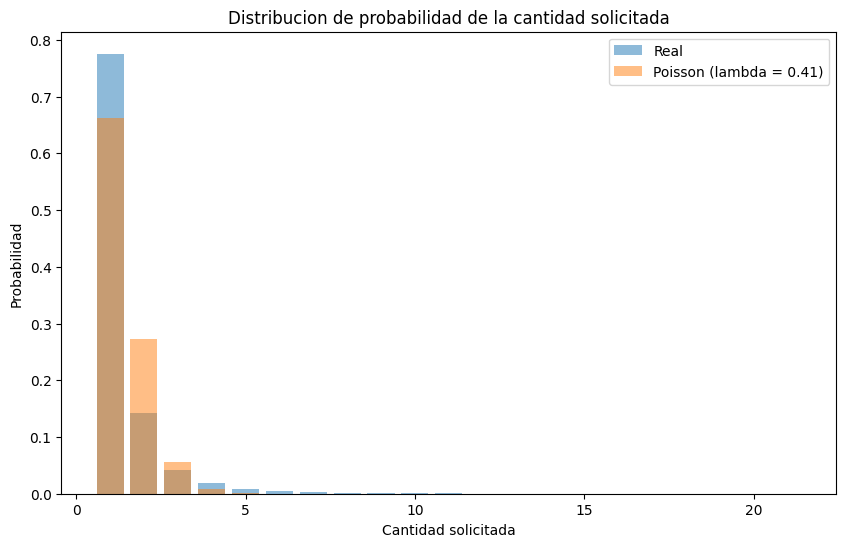

In [14]:
# Graficar la poison simulada y la real, pero solo hasta 20 unidades
# Generamos la distribucion de poisson
def poisson(x, mu):
    return (np.exp(-mu) * mu**x)/np.math.factorial(x)
numero_muestras = 20
muestra = np.arange(0, numero_muestras)
distribucion_poisson = [poisson(x, Media_UF-1) for x in muestra]
# Comparamos con la Cantidad_por_factura
plt.figure(figsize=(10, 6))
label2 = 'Poisson (lambda = '+str(round(Media_UF-1, 2))+')'
plt.bar(Cantidad_por_factura[' Unidades '][:numero_muestras], Cantidad_por_factura['Probabilidad'][:numero_muestras], label='Real', alpha=0.5)
plt.bar(np.arange(1, numero_muestras+1), distribucion_poisson, label=label2, alpha=0.5)
plt.xlabel('Cantidad solicitada')
plt.ylabel('Probabilidad')
plt.title('Distribucion de probabilidad de la cantidad solicitada')
plt.legend()
plt.show()

   Producto  Probabilidad
0        23      0.000057
1        29      0.000057
2        30      0.000200
3        60      0.000029
4        66      0.000200


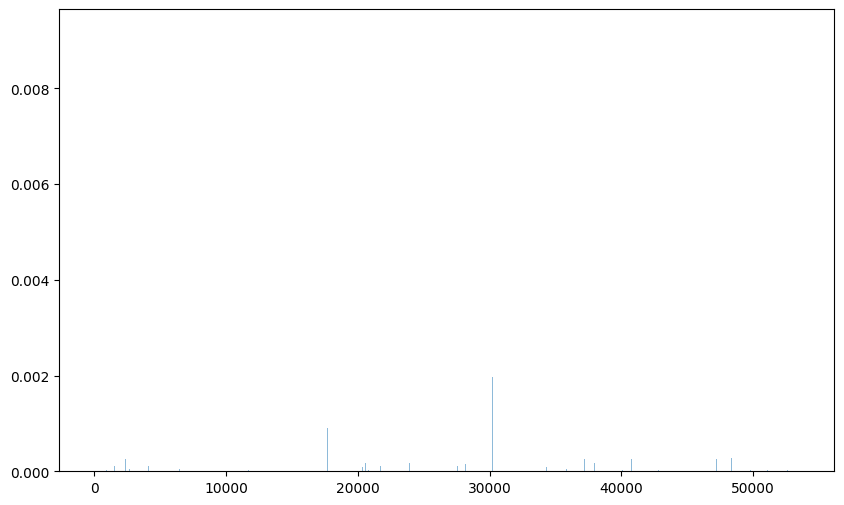

In [7]:
# Ahora sacamos la probabilidad de sacar un producto en especifico
# Agrupamos por producto y sumamos las unidades, pero primero eliminamos la factura
Cantidad_por_producto = informacion_compra.drop(columns=['Factura']).groupby(['Producto']).sum()
# Calculamos las probabilidades de que se pida tal producto
Cantidad_por_producto = Cantidad_por_producto[' Unidades ']/Cantidad_por_producto[' Unidades '].sum()
# Reiniciamos el indice
Cantidad_por_producto = Cantidad_por_producto.reset_index(name='Probabilidad')
# Imprimomos las probabilidades
print(Cantidad_por_producto.head())
# Guardamos la distribucion de probabilidad
Cantidad_por_producto.to_csv('Datos/DistP.csv', index=False)
# graficamos la distribucion de probabilidad
plt.figure(figsize=(10, 6))
plt.bar(Cantidad_por_producto['Producto'], Cantidad_por_producto['Probabilidad'], alpha=0.5)
plt.show()


In [8]:
# guardamos la informacion de los productos
info_productos.to_csv('Datos/infoP.csv', index=False)